# Paper Figure 4: Search

This notebook uses GPU, so please run in an environment with CUDA installed.


In [1]:
import os
from test_files import get_files, prepare_test

files = ['thermo_HeLa.raw', 'human.fasta']

In [2]:
!nvidia-smi

Wed Jul 19 16:50:01 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.25                 Driver Version: 536.25       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti   WDDM  | 00000000:65:00.0 Off |                  N/A |
| 30%   32C    P8              24W / 250W |   3911MiB / 11264MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import cupy
print(cupy.__version__)

8.3.0


In [4]:
tmp_folder = 'F:/projects/alphapept/sandbox/temp'
test_folder = 'fig3'

In [5]:
get_files(tmp_folder, files)
prepare_test(files, tmp_folder, test_folder)

Creating dir F:/projects/alphapept/sandbox/temp\fig4.


## Convert raw and find features

In [6]:
import alphapept.settings
import alphapept.paths
import alphapept.interface
import alphapept.fasta

test_folder = os.path.join(tmp_folder, test_folder)

file_name = os.path.join(test_folder, files[0])
settings = alphapept.settings.load_settings(alphapept.paths.DEFAULT_SETTINGS_PATH)
settings['experiment']['file_paths'] = [file_name]
settings['experiment']['fasta_paths'] = [os.path.join(test_folder, files[1])]
settings['experiment']['database_path'] = os.path.join(test_folder, 'database.hdf')

settings_ = alphapept.interface.create_database(settings)
settings_ = alphapept.interface.import_raw_data(settings)
settings_ = alphapept.interface.feature_finding(settings)
base, ext = os.path.splitext(file_name)

2023-07-19 16:50:11> Logging to C:\Users\admin\alphapept\logs\log_20230719165011.txt.
2023-07-19 16:50:11> Code location f:\projects\alphapept\alphapept
2023-07-19 16:50:11> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-19 16:50:11> Platform information:
2023-07-19 16:50:11> system     - Windows
2023-07-19 16:50:11> release    - 10
2023-07-19 16:50:11> version    - 10.0.19044
2023-07-19 16:50:11> machine    - AMD64
2023-07-19 16:50:11> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-19 16:50:11> cpu count  - 24
2023-07-19 16:50:11> ram memory - 115.9/127.7 Gb (available/total)
2023-07-19 16:50:11> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-19 16:50:11> Python information:
2023-07-19 16:50:11> SQLAlchemy                    - 1.4.39
2023-07-19 16:50:11> alphapept                     - 0.5.0
2023-07-19 16:50:11> alpharaw                      - 0.1.0
2023-07-19 16:50:11> alphatims                     - 1.0.7

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-19 16:50:12> FASTA contains 20,365 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:48<00:00, 23.38s/it]

2023-07-19 16:52:11> Digested 20,365 proteins and generated 5,107,804 spectra
2023-07-19 16:52:57> Database saved to F:/projects/alphapept/sandbox/temp\fig4\database.hdf. Filesize of database is 1.96 GB


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:46<00:00, 166.15s/it]


2023-07-19 16:53:05> Logging to C:\Users\admin\alphapept\logs\log_20230719165305.txt.
2023-07-19 16:53:05> Code location f:\projects\alphapept\alphapept
2023-07-19 16:53:05> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-19 16:53:05> Platform information:
2023-07-19 16:53:05> system     - Windows
2023-07-19 16:53:05> release    - 10
2023-07-19 16:53:05> version    - 10.0.19044
2023-07-19 16:53:05> machine    - AMD64
2023-07-19 16:53:05> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-19 16:53:05> cpu count  - 24
2023-07-19 16:53:05> ram memory - 116.4/127.7 Gb (available/total)
2023-07-19 16:53:05> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-19 16:53:05> Python information:
2023-07-19 16:53:05> SQLAlchemy                    - 1.4.39
2023-07-19 16:53:05> alphapept                     - 0.5.0
2023-07-19 16:53:05> alpharaw                      - 0.1.0
2023-07-19 16:53:05> alphatims                     - 1.0.7

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-19 16:53:05> Processing 1 files for step raw_conversion
2023-07-19 16:53:05> File F:/projects/alphapept/sandbox/temp\fig4\thermo_HeLa has extension .raw - converting from Thermo.
2023-07-19 16:55:08> File conversion complete. Extracted 120,226 precursors.
2023-07-19 16:55:09> File conversion of file F:/projects/alphapept/sandbox/temp\fig4\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [02:03<?, ?it/s]

2023-07-19 16:55:09> Logging to C:\Users\admin\alphapept\logs\log_20230719165509.txt.
2023-07-19 16:55:09> Code location f:\projects\alphapept\alphapept
2023-07-19 16:55:09> Python location C:\ProgramData\Miniconda3\envs\alphapept\python.exe
2023-07-19 16:55:09> Platform information:
2023-07-19 16:55:09> system     - Windows
2023-07-19 16:55:09> release    - 10
2023-07-19 16:55:09> version    - 10.0.19044
2023-07-19 16:55:09> machine    - AMD64
2023-07-19 16:55:09> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2023-07-19 16:55:09> cpu count  - 24
2023-07-19 16:55:09> ram memory - 115.0/127.7 Gb (available/total)
2023-07-19 16:55:09> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel


2023-07-19 16:55:10> Python information:
2023-07-19 16:55:10> SQLAlchemy                    - 1.4.39
2023-07-19 16:55:10> alphapept                     - 0.5.0
2023-07-19 16:55:10> alpharaw                      - 0.1.0
2023-07-19 16:55:10> alphatims                     - 1.0.7
2023-07-19 16:55:10> biopython                     - 1.79
2023-07-19 16:55:10> bumpversion                   - 0.6.0
2023-07-19 16:55:10> bumpversion>                  - 
2023-07-19 16:55:10> click                         - 8.1.3
2023-07-19 16:55:10> click>                        - 
2023-07-19 16:55:10> fastcore                      - 1.5.29
2023-07-19 16:55:10> h5py                          - 3.7.0
2023-07-19 16:55:10> jupyter                       - 1.0.0
2023-07-19 16:55:10> jupyter>                      - 
2023-07-19 16:55:10> jupyter_contrib_nbextensions  - 
2023-07-19 16:55:10> jupyter_contrib_nbextensions> - 
2023-07-19 16:55:10> matplotlib                    - 3.7.1
2023-07-19 16:55:10> nbdev             

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2023-07-19 16:55:12> Processing 1 files for step find_features
2023-07-19 16:55:12> No *.hdf file with features found for F:/projects/alphapept/sandbox/temp\fig4\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2023-07-19 16:55:12> Feature finding on F:/projects/alphapept/sandbox/temp\fig4\thermo_HeLa.raw
2023-07-19 16:55:12> Hill extraction with centroid_tol 8 and max_gap 2
2023-07-19 16:55:16> Number of hills 1,105,353, len = 17.35
2023-07-19 16:55:16> Repeating hill extraction with centroid_tol 5.87
2023-07-19 16:55:18> Number of hills 1,227,331, len = 19.44
2023-07-19 16:55:21> After duplicate removal of hills 1,025,845
2023-07-19 16:55:35> After split hill_ptrs 1,207,373
2023-07-19 16:55:37> After filter hill_ptrs 1,188,406
2023-07-19 16:57:32> Extracting hill stats complete
2023-07-19 16:57:45> Found 184,383 pre isotope patterns.
2023-07-19 16:58:41> Extracted 198,500 isotope patterns.
2023-07-19 16:58:53> Report complete.
2023-07-19 16:58:53> Matching features to query d

  0%|                                                                                            | 0/1 [03:42<?, ?it/s]


In [7]:
ms_file_ = alphapept.io.MS_Data_File(f"{base}.ms_data.hdf", is_read_only=True)
query_data = ms_file_.read_DDA_query_data()

query_data = ms_file_.read_DDA_query_data(
    calibrated_fragments=True,
    database_file_name=settings['experiment']['database_path']
)

db_data = alphapept.fasta.read_database(settings['experiment']['database_path'])
features = ms_file_.read(dataset_name="features")

2023-07-19 16:58:55> Calibrating fragments


C:\ProgramData\Miniconda3\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Miniconda3\envs\alphapept\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
import alphapept.search
from time import time
import importlib

timing_dict = {}
for mode in ['cuda','numba-multithread','numba','python']:

    alphapept.performance.set_compilation_mode(mode)

    importlib.reload(alphapept.search)
    start = time()
    psms, num_specs_compared = alphapept.search.get_psms(query_data, db_data, features, **settings["search"])
    end = time()

    print(f"Time elapsed {end-start}, found {len(psms):,}")
    
    
    timing_dict[mode] = end-start

2023-07-19 16:59:22> Performing search on 246,847 query and 5,107,804 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-19 17:00:37> Found 1,209,083 psms.
Time elapsed 77.43661856651306, found 1,209,083
2023-07-19 17:00:38> Performing search on 246,847 query and 5,107,804 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-19 17:00:47> Found 1,209,083 psms.
Time elapsed 9.291632652282715, found 1,209,083
2023-07-19 17:00:47> Performing search on 246,847 query and 5,107,804 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-19 17:02:06> Found 1,209,083 psms.
Time elapsed 79.70707726478577, found 1,209,083
2023-07-19 17:02:07> Performing search on 246,847 query and 5,107,804 db entries with frag_tol = 50.00 and prec_tol = 20.00.
2023-07-20 03:24:58> Found 1,209,083 psms.
Time elapsed 37371.274493932724, found 1,209,083


In [1]:
timing_dict = {'cuda':77.43661856651306,
 'numba-multithread':  9.291632652282715,
 'numba': 79.70707726478577,
 'python': 37371.274493932724}

C:\Users\admin\AppData\Local\Temp\ipykernel_704\645782630.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 100000])


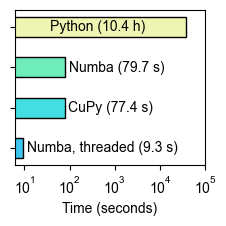

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

dark_blue = '#17212b'
light_blue = '#3dc5ef'
teal= '#42dee1'
green = '#6eecb9'
yellow = '#eef5b3'

colors = [light_blue, teal, green, yellow]
data = pd.DataFrame(timing_dict.values(), index = timing_dict.keys())
data = data.sort_values(0)

hfont = {'fontname':'Arial', 'size':10}
plt.figure(figsize=(2.363,2.363)) #60x60


python_time = timing_dict['python']/60/60
text = [f'Python ({python_time:.1f} h)', f"Numba ({timing_dict['numba']:.1f} s)", f"CuPy ({timing_dict['cuda']:.1f} s)", f"Numba, threaded ({timing_dict['numba-multithread']:.1f} s)"]

height=0.5

for i in range(len(data)): 
    t = data.iloc[i][0]
    plt.barh(i, t, height, color = colors[i], linewidth=1, edgecolor='black')
    
    if i == 3:
        plt.text(t/1000, i, text[::-1][i], **hfont, va='center')
    else:
        plt.text(t*1.2, i, text[::-1][i], **hfont, va='center')

plt.yticks(range(len(data)), data.index, **hfont)
plt.xticks(**hfont)

plt.xscale('log')
plt.xlim([0, 100000])
plt.xlabel('Time (seconds)', **hfont)

ax = plt.gca()
ax.set_yticklabels([])
plt.xticks([1e1, 1e2 , 1e3, 1e4, 1e5])

plt.tight_layout()
plt.savefig('./figures/03_search.pdf')  
plt.show()